<a href="https://colab.research.google.com/github/simnpeter/ITDS/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, TimeSeriesSplit, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import make_regression
import urllib.request
import zipfile
import io
import os
from datetime import datetime
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Exercise 1 - Univariate regression on analytical functions

In [55]:
def f1(x):
  return x * np.sin(x) + 2 * x

def f2(x):
  return 10 * np.sin(x) + x**2

def f3(x):
  return np.sign(x) * (x**2 + 300) + 20 * np.sin(x)

In [56]:
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
  model.fit(X_train.reshape(-1, 1), y_train)
  y_pred = model.predict(X_test.reshape(-1, 1))

  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)

  print(f"{model_name} - MSE: {mse:.4f}, R² Score: {r2:.4f}")

  return y_pred, mse, r2

def plot_regression_results(X_test, y_test, y_preds, model_names, function_name):
  plt.figure(figsize=(14, 8))
  plt.scatter(X_test, y_test, color='black', label='True values', s=10)

  for y_pred, model_name in zip(y_preds, model_names):
      plt.plot(X_test, y_pred, linewidth=2, label=f'{model_name}')

  plt.title(f'Regression results for {function_name}', fontsize=16)
  plt.xlabel('X', fontsize=14)
  plt.ylabel('Y', fontsize=14)
  plt.legend(fontsize=12)
  plt.grid(True)
  plt.show()

In [57]:
def create_dataset(f):
  tr = 20
  n_samples = 100
  X = np.linspace(-tr, tr, n_samples)
  y = f(X)
  return X, y

In [58]:
def split_dataset(X, y, train_size=0.7):
  X_train, X_test, y_train, y_test = train_test_split(
      X, y, train_size=train_size, random_state=42, shuffle=True
  )
  return X_train, X_test, y_train, y_test

In [59]:
def draw_function(X, y, f_name):
  plt.figure(figsize=(14, 6))
  plt.scatter(X, y, color='blue', s=10)
  plt.title(f'Shape of {f_name}', fontsize=16)
  plt.xlabel('X', fontsize=14)
  plt.ylabel('Y', fontsize=14)
  plt.grid(True)
  plt.show()


### Function: f1(x) = x·sin(x) + 2x


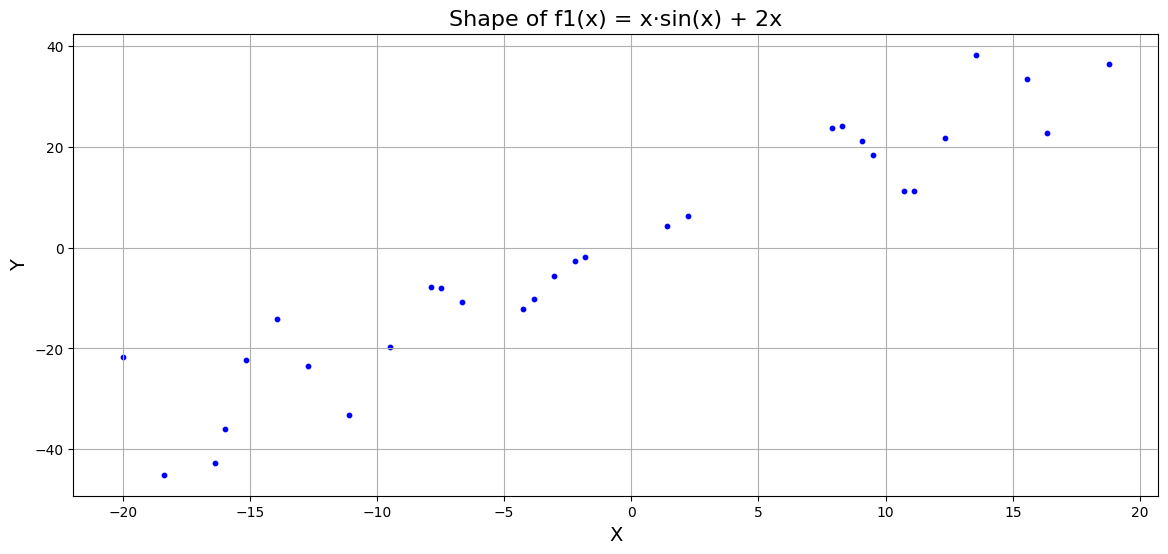

Model performance on original data:
Linear Regression - MSE: 57.4203, R² Score: 0.8920
Ridge Regression - MSE: 57.4111, R² Score: 0.8920
SVR (Linear Kernel) - MSE: 56.6419, R² Score: 0.8935
SVR (RBF Kernel) - MSE: 0.3171, R² Score: 0.9994
Random Forest - MSE: 7.0098, R² Score: 0.9868


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP Neural Network - MSE: 57.4589, R² Score: 0.8919


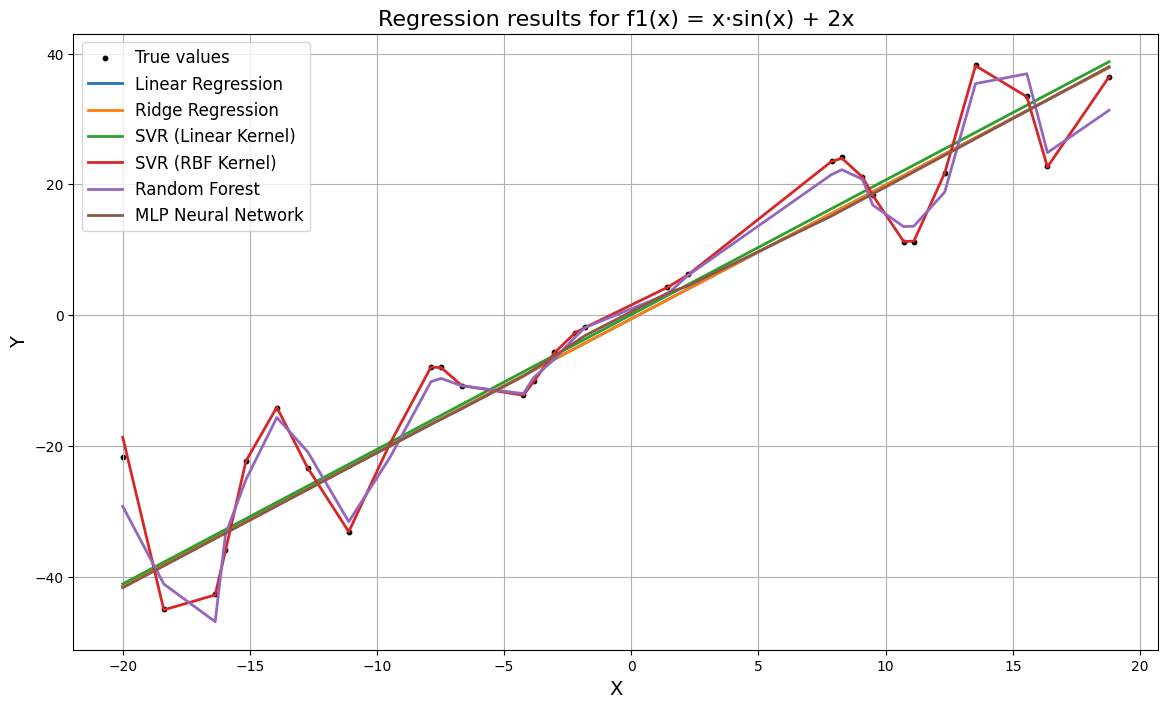


Model performance with polynomial features (degree=3):
Linear Regression - MSE: 57.4203, R² Score: 0.8920
Ridge Regression - MSE: 57.4111, R² Score: 0.8920
SVR (Linear Kernel) - MSE: 56.6419, R² Score: 0.8935
SVR (RBF Kernel) - MSE: 0.3171, R² Score: 0.9994
Random Forest - MSE: 7.0098, R² Score: 0.9868
MLP Neural Network - MSE: 57.4589, R² Score: 0.8919
SVR (RBF Kernel) with Polynomial Features - MSE: 534.6211, R² Score: -0.0056


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


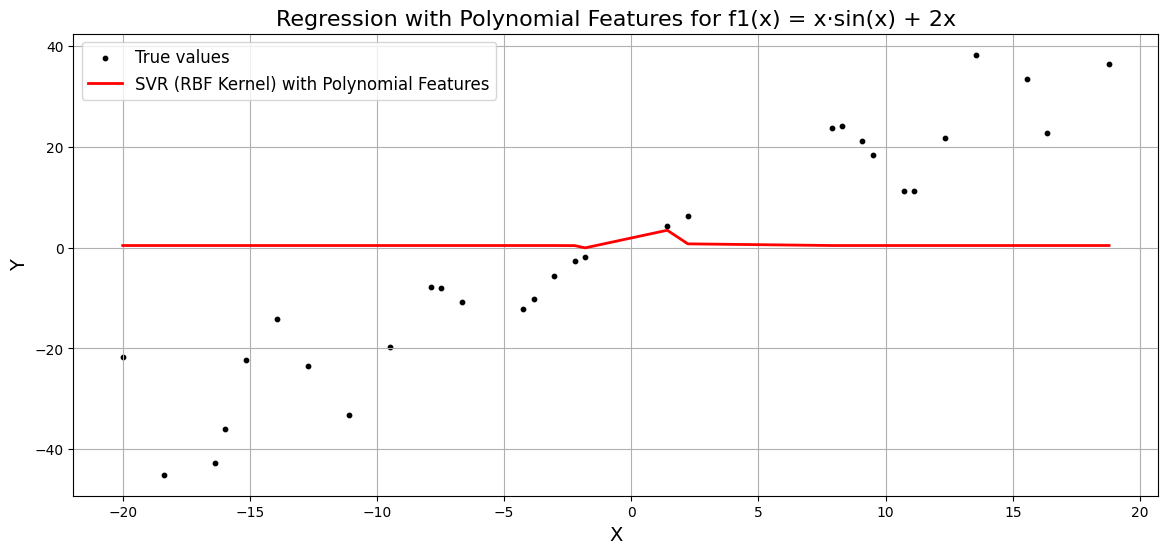


### Function: f2(x) = 10·sin(x) + x²


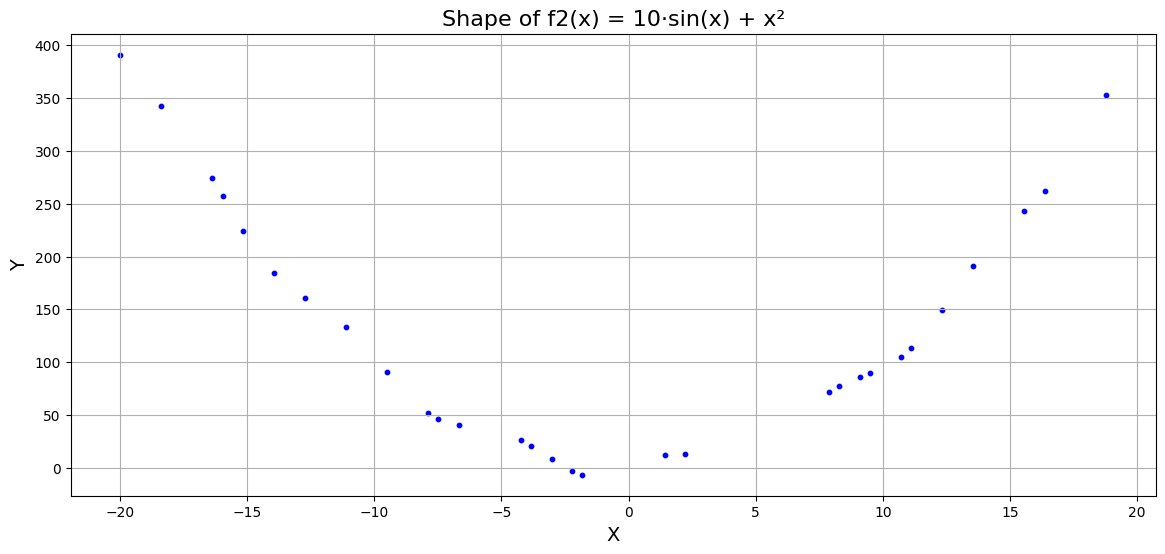

Model performance on original data:
Linear Regression - MSE: 12926.8062, R² Score: -0.0187
Ridge Regression - MSE: 12926.7785, R² Score: -0.0187
SVR (Linear Kernel) - MSE: 13701.6817, R² Score: -0.0798
SVR (RBF Kernel) - MSE: 55.9683, R² Score: 0.9956
Random Forest - MSE: 46.3123, R² Score: 0.9964


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP Neural Network - MSE: 212.6281, R² Score: 0.9832


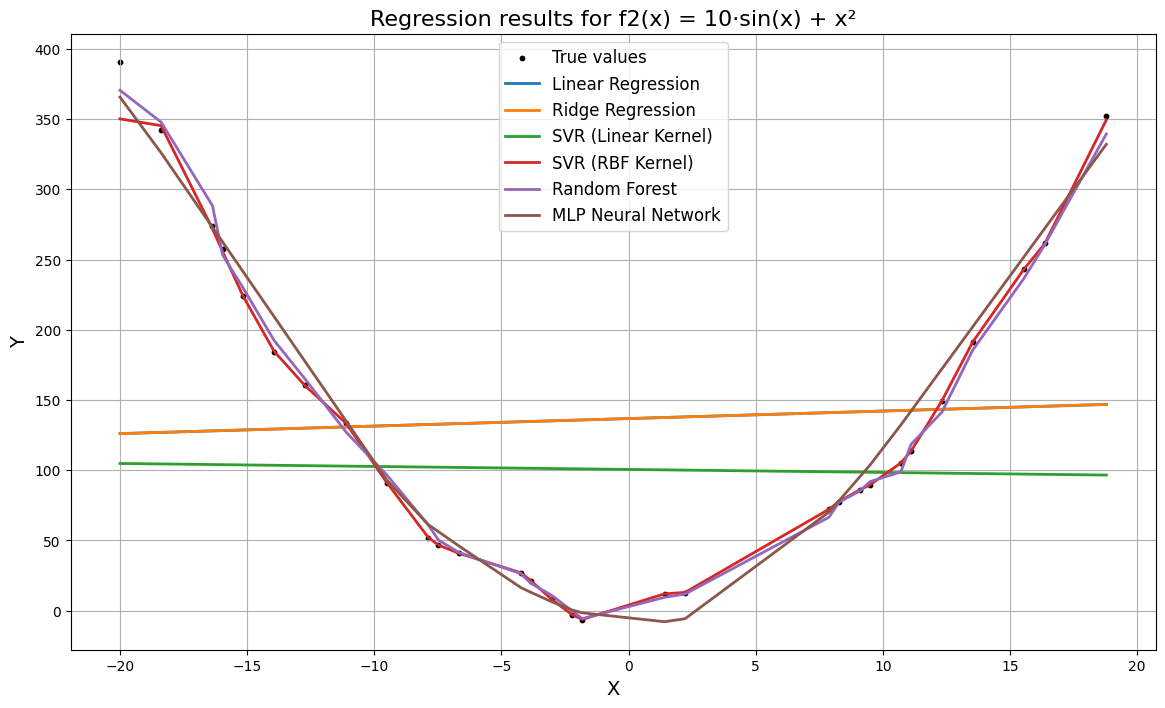


Model performance with polynomial features (degree=3):
Linear Regression - MSE: 12926.8062, R² Score: -0.0187
Ridge Regression - MSE: 12926.7785, R² Score: -0.0187
SVR (Linear Kernel) - MSE: 13701.6817, R² Score: -0.0798
SVR (RBF Kernel) - MSE: 55.9683, R² Score: 0.9956
Random Forest - MSE: 46.3123, R² Score: 0.9964


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP Neural Network - MSE: 212.6281, R² Score: 0.9832
Random Forest with Polynomial Features - MSE: 75.5605, R² Score: 0.9940


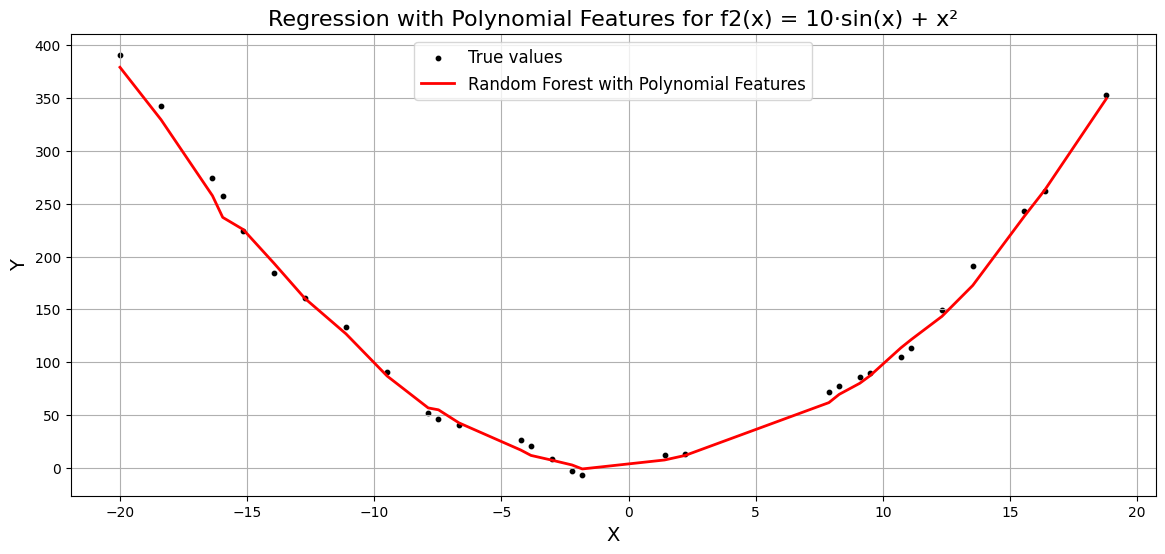


### Function: f3(x) = sign(x)(x² + 300) + 20·sin(x)


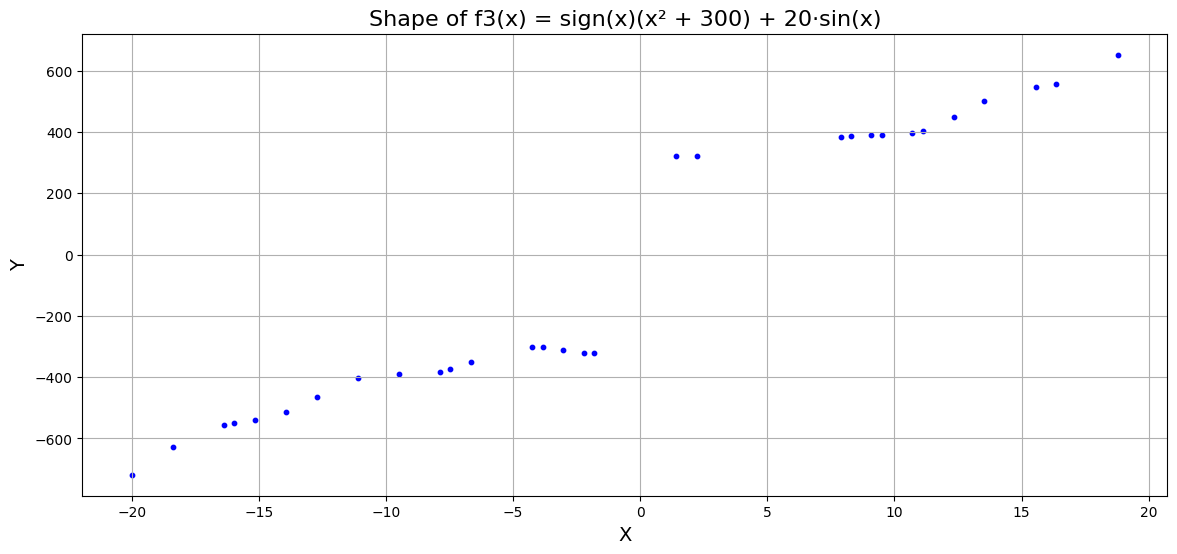

Model performance on original data:
Linear Regression - MSE: 13568.7639, R² Score: 0.9322
Ridge Regression - MSE: 13569.3727, R² Score: 0.9322
SVR (Linear Kernel) - MSE: 13616.2357, R² Score: 0.9320
SVR (RBF Kernel) - MSE: 3845.9546, R² Score: 0.9808
Random Forest - MSE: 71.5870, R² Score: 0.9996


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP Neural Network - MSE: 1973.4611, R² Score: 0.9901


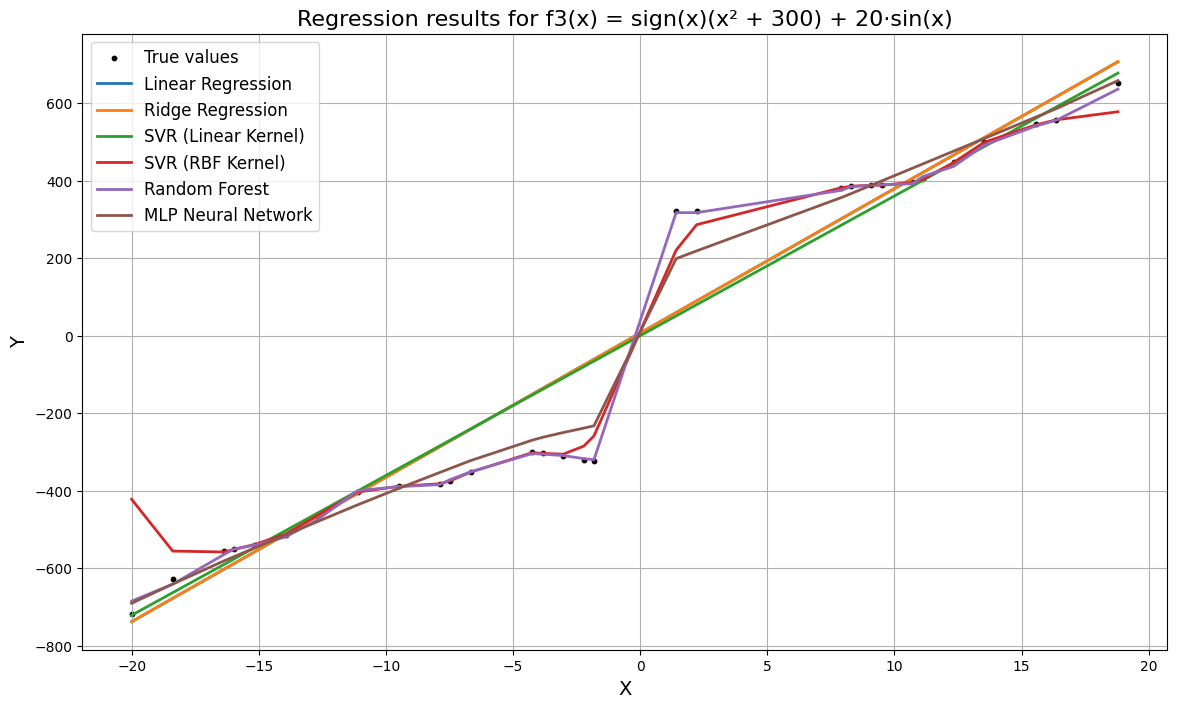


Model performance with polynomial features (degree=3):
Linear Regression - MSE: 13568.7639, R² Score: 0.9322
Ridge Regression - MSE: 13569.3727, R² Score: 0.9322
SVR (Linear Kernel) - MSE: 13616.2357, R² Score: 0.9320
SVR (RBF Kernel) - MSE: 3845.9546, R² Score: 0.9808
Random Forest - MSE: 71.5870, R² Score: 0.9996


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP Neural Network - MSE: 1973.4611, R² Score: 0.9901
Random Forest with Polynomial Features - MSE: 75.2599, R² Score: 0.9996


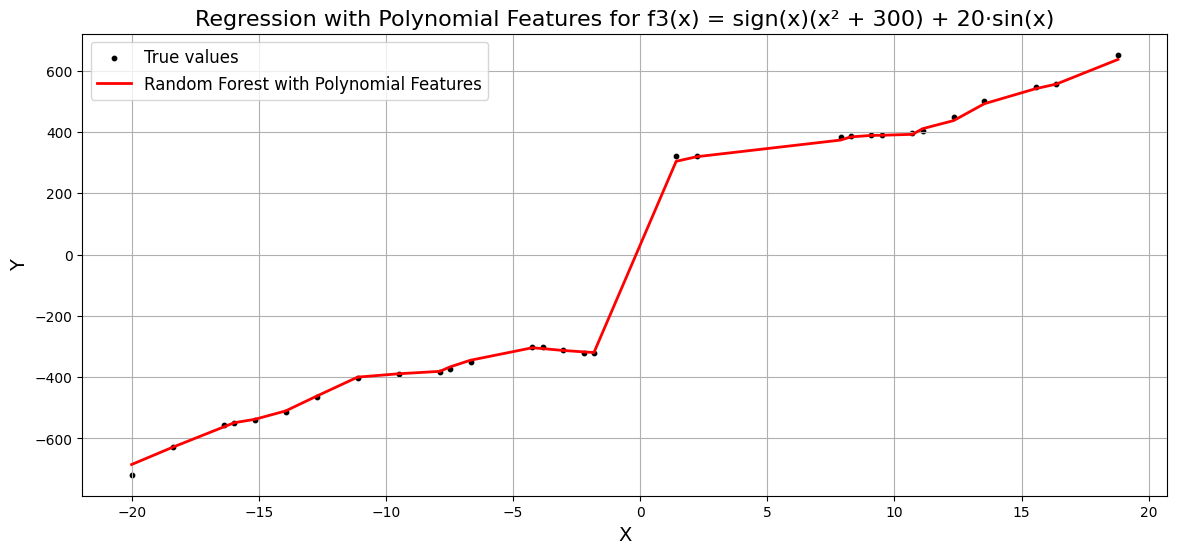

In [60]:
for f, f_name in zip([f1, f2, f3], ["f1(x) = x·sin(x) + 2x",
                                  "f2(x) = 10·sin(x) + x²",
                                  "f3(x) = sign(x)(x² + 300) + 20·sin(x)"]):
  print(f"\n### Function: {f_name}")

  #exercise 1.1
  X, y = create_dataset(f)
  X_train, X_test, y_train, y_test = split_dataset(X, y)
  y_test = y_test[X_test.argsort()]
  X_test.sort()

  #exercise 1.2
  draw_function(X_test, y_test, f_name)

  #exercise 1.3
  models = [
      (LinearRegression(), "Linear Regression"),
      (Ridge(alpha=1.0), "Ridge Regression"),
      (SVR(kernel='linear'), "SVR (Linear Kernel)"),
      (SVR(kernel='rbf', C=100, gamma=0.1), "SVR (RBF Kernel)"),
      (RandomForestRegressor(n_estimators=100, random_state=42), "Random Forest"),
      (MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42), "MLP Neural Network")
  ]

  y_preds = []
  model_names = []

  print("Model performance on original data:")
  for model, name in models:
      y_pred, mse, r2 = evaluate_model(model, X_train, X_test, y_train, y_test, name)
      y_preds.append(y_pred)
      model_names.append(name)

  #exercise 1.4
  plot_regression_results(X_test, y_test, y_preds, model_names, f_name)

  #exercise 1.5
  print("\nModel performance with polynomial features (degree=3):")

  poly = PolynomialFeatures(degree=3)
  X_train_poly = poly.fit_transform(X_train.reshape(-1, 1))
  X_test_poly = poly.transform(X_test.reshape(-1, 1))

  best_model, best_name = models[np.argmin([mse for _, mse, _ in [evaluate_model(model, X_train, X_test, y_train, y_test, name) for model, name in models]])]
  best_model.fit(X_train_poly, y_train)
  y_pred_poly = best_model.predict(X_test_poly)

  mse_poly = mean_squared_error(y_test, y_pred_poly)
  r2_poly = r2_score(y_test, y_pred_poly)

  print(f"{best_name} with Polynomial Features - MSE: {mse_poly:.4f}, R² Score: {r2_poly:.4f}")

  plt.figure(figsize=(14, 6))
  plt.scatter(X_test, y_test, color='black', label='True values', s=10)
  plt.plot(X_test, y_pred_poly, color='red', linewidth=2, label=f'{best_name} with Polynomial Features')
  plt.title(f'Regression with Polynomial Features for {f_name}', fontsize=16)
  plt.xlabel('X', fontsize=14)
  plt.ylabel('Y', fontsize=14)
  plt.legend(fontsize=12)
  plt.grid(True)
  plt.show()


## Exercise 2 - Multivariate regression on synthetic data

In [61]:
#exercise 2.1
n_samples = 2000
n_features = 20
n_informative = 10
X, y = make_regression(n_samples=n_samples, n_features=n_features,
                      n_informative=n_informative, random_state=42)

print(f"Generated dataset with {n_samples} samples and {n_features} features (only {n_informative} are informative)")

X_train, X_test, y_train, y_test = split_dataset(X, y)


Generated dataset with 2000 samples and 20 features (only 10 are informative)


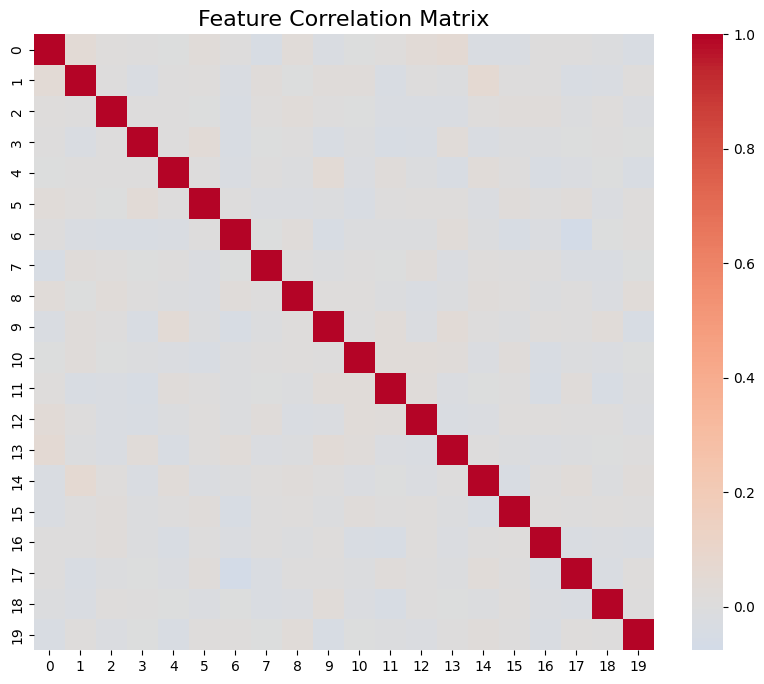


Model performance on multivariate synthetic data:
Linear Regression - MSE: 0.0000, R² Score: 1.0000
Ridge Regression - MSE: 0.0146, R² Score: 1.0000
Lasso Regression - MSE: 0.0990, R² Score: 1.0000
Random Forest - MSE: 4907.4895, R² Score: 0.8351
SVR (RBF) - MSE: 1831.1610, R² Score: 0.9385


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP Neural Network - MSE: 13.7293, R² Score: 0.9995


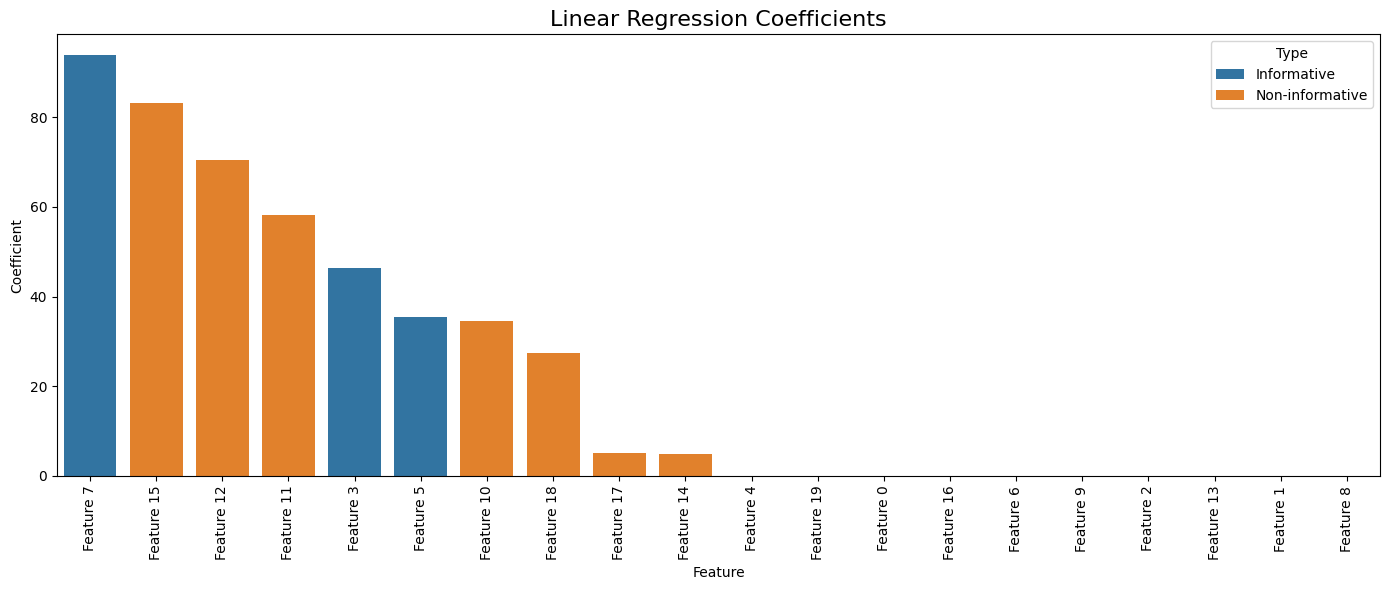

In [62]:
#exercise 2.2
plt.figure(figsize=(10, 8))
correlation_matrix = np.corrcoef(X.T)
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix', fontsize=16)
plt.show()

models = [
    (LinearRegression(), "Linear Regression"),
    (Ridge(alpha=1.0), "Ridge Regression"),
    (Lasso(alpha=0.1), "Lasso Regression"),
    (RandomForestRegressor(n_estimators=100, random_state=42), "Random Forest"),
    (SVR(kernel='rbf', C=100, gamma='scale'), "SVR (RBF)"),
    (MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42), "MLP Neural Network")
]

print("\nModel performance on multivariate synthetic data:")
for model, name in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"{name} - MSE: {mse:.4f}, R² Score: {r2:.4f}")

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

plt.figure(figsize=(14, 6))
feature_importance = pd.DataFrame({
    'Feature': [f"Feature {i}" for i in range(n_features)],
    'Coefficient': linear_model.coef_
})
feature_importance = feature_importance.sort_values('Coefficient', key=abs, ascending=False)

feature_importance['Type'] = 'Non-informative'
feature_numbers = feature_importance['Feature'].str.extract('(\d+)').iloc[:, 0].astype(int)
feature_importance.loc[feature_numbers < n_informative, 'Type'] = 'Informative'

sns.barplot(x='Feature', y='Coefficient', hue='Type', data=feature_importance)
plt.title('Linear Regression Coefficients', fontsize=16)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Model performance on more challenging synthetic data (with noise):
Linear Regression - MSE: 2807.4057, R² Score: 0.8570
Ridge Regression - MSE: 2808.7641, R² Score: 0.8569
Lasso Regression - MSE: 2810.5254, R² Score: 0.8568
Random Forest - MSE: 4274.9943, R² Score: 0.7822
SVR (RBF) - MSE: 4492.0969, R² Score: 0.7712


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP Neural Network - MSE: 5479.9573, R² Score: 0.7209


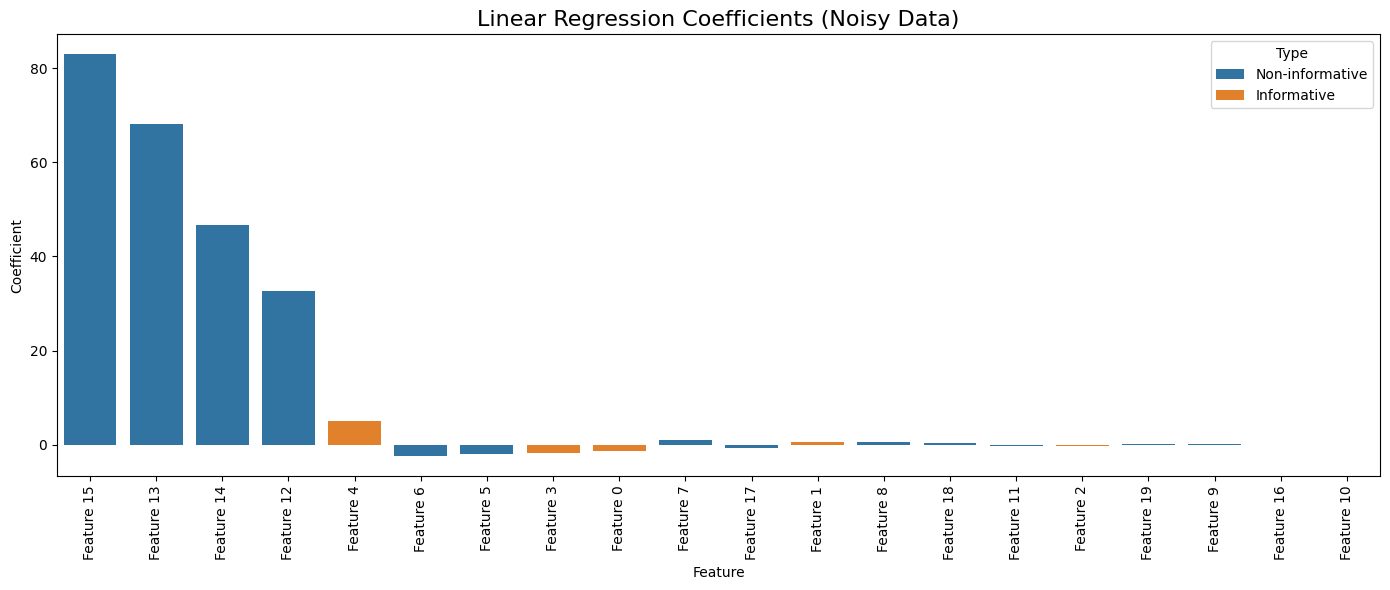

In [63]:
#exercise 2.3
X_noisy, y_noisy = make_regression(n_samples=n_samples, n_features=n_features,
                                 n_informative=5, noise=50.0, random_state=42)

X_train_noisy, X_test_noisy, y_train_noisy, y_test_noisy = train_test_split(
    X_noisy, y_noisy, test_size=0.3, random_state=42
)

print("\nModel performance on more challenging synthetic data (with noise):")
for model, name in models:
    model.fit(X_train_noisy, y_train_noisy)
    y_pred = model.predict(X_test_noisy)

    mse = mean_squared_error(y_test_noisy, y_pred)
    r2 = r2_score(y_test_noisy, y_pred)

    print(f"{name} - MSE: {mse:.4f}, R² Score: {r2:.4f}")

linear_model_noisy = LinearRegression()
linear_model_noisy.fit(X_train_noisy, y_train_noisy)

plt.figure(figsize=(14, 6))
feature_importance_noisy = pd.DataFrame({
    'Feature': [f"Feature {i}" for i in range(n_features)],
    'Coefficient': linear_model_noisy.coef_
})
feature_importance_noisy = feature_importance_noisy.sort_values('Coefficient', key=abs, ascending=False)

feature_importance_noisy['Type'] = 'Non-informative'
feature_numbers_noisy = feature_importance_noisy['Feature'].str.extract('(\d+)').iloc[:, 0].astype(int)
feature_importance_noisy.loc[feature_numbers_noisy < 5, 'Type'] = 'Informative'

sns.barplot(x='Feature', y='Coefficient', hue='Type', data=feature_importance_noisy)
plt.title('Linear Regression Coefficients (Noisy Data)', fontsize=16)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Exercise 3 - Temperature series forecasting

In [64]:
#exercise 3.1
weather_data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/SummaryofWeather.csv", low_memory=False)

Dataset shape: (119040, 31)
Dataset columns: ['STA', 'Date', 'Precip', 'WindGustSpd', 'MaxTemp', 'MinTemp', 'MeanTemp', 'Snowfall', 'PoorWeather', 'YR', 'MO', 'DA', 'PRCP', 'DR', 'SPD', 'MAX', 'MIN', 'MEA', 'SNF', 'SND', 'FT', 'FB', 'FTI', 'ITH', 'PGT', 'TSHDSBRSGF', 'SD3', 'RHX', 'RHN', 'RVG', 'WTE']

Missing values in the dataset:
STA         0
Date        0
MeanTemp    0
MaxTemp     0
MinTemp     0
dtype: int64

Top 10 most complete sensors (in terms of collected data):
       MeanTemp  Date  Completeness
STA                                
22508      2192  2192         100.0
10701      2185  2185         100.0
22502      2154  2154         100.0
22504      2118  2118         100.0
10803      1750  1750         100.0
11610      1631  1631         100.0
16405      1622  1622         100.0
11601      1604  1604         100.0
10502      1527  1527         100.0
11604      1514  1514         100.0


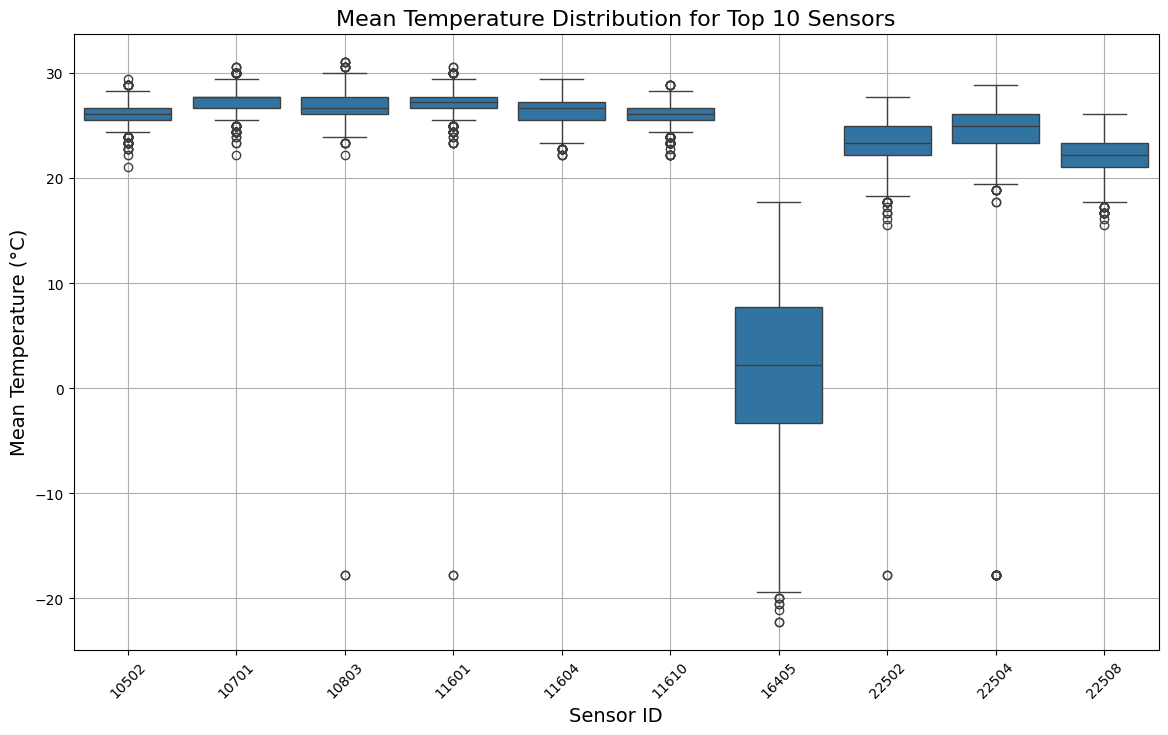

In [65]:
#exercise 3.2
weather_data['Date'] = pd.to_datetime(weather_data['Date'])

print(f"Dataset shape: {weather_data.shape}")
print(f"Dataset columns: {weather_data.columns.tolist()}")

print("\nMissing values in the dataset:")
print(weather_data[['STA', 'Date', 'MeanTemp', 'MaxTemp', 'MinTemp']].isnull().sum())

print("\nTop 10 most complete sensors (in terms of collected data):")
sensor_completeness = weather_data.groupby('STA').agg({
    'MeanTemp': lambda x: x.notnull().sum(),
    'Date': 'count'
}).sort_values('MeanTemp', ascending=False)

sensor_completeness['Completeness'] = sensor_completeness['MeanTemp'] / sensor_completeness['Date'] * 100
print(sensor_completeness.head(10))

top_10_sensors = sensor_completeness.head(10).index.tolist()
top_sensors_data = weather_data[weather_data['STA'].isin(top_10_sensors)]

plt.figure(figsize=(14, 8))
sns.boxplot(x='STA', y='MeanTemp', data=top_sensors_data)
plt.title('Mean Temperature Distribution for Top 10 Sensors', fontsize=16)
plt.xlabel('Sensor ID', fontsize=14)
plt.ylabel('Mean Temperature (°C)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [66]:
#exercise 3.3
sensor_data = weather_data[weather_data['STA'] == 22508].copy()
sensor_data = sensor_data.sort_values('Date')

print(f"\nData for sensor 22508:")
print(f"Number of records: {len(sensor_data)}")
print(f"Date range: from {sensor_data['Date'].min()} to {sensor_data['Date'].max()}")
print(f"Missing MeanTemp values: {sensor_data['MeanTemp'].isnull().sum()} out of {len(sensor_data)}")



Data for sensor 22508:
Number of records: 2192
Date range: from 1940-01-01 00:00:00 to 1945-12-31 00:00:00
Missing MeanTemp values: 0 out of 2192


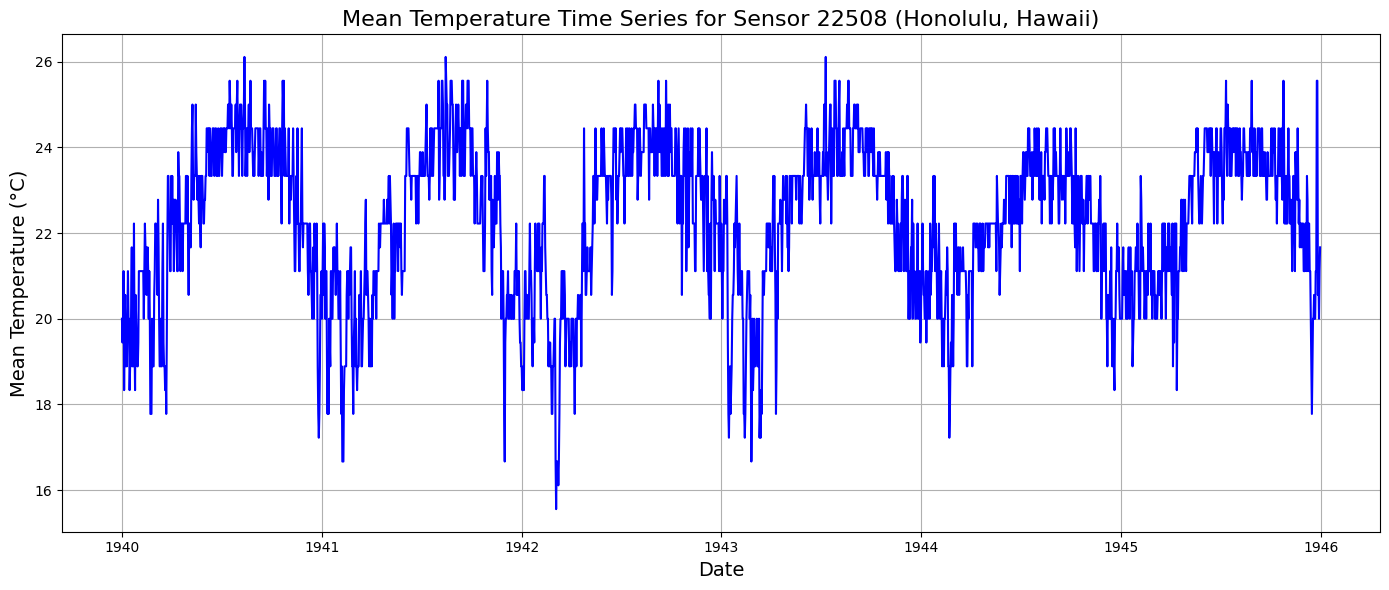


Handling missing values in the time series
All missing values have been interpolated.


In [67]:
#exercise 3.4
plt.figure(figsize=(14, 6))
plt.plot(sensor_data['Date'], sensor_data['MeanTemp'], color='blue')
plt.title('Mean Temperature Time Series for Sensor 22508 (Honolulu, Hawaii)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Mean Temperature (°C)', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

print("\nHandling missing values in the time series")

sensor_data['MeanTemp'] = sensor_data['MeanTemp'].interpolate(method='linear')

if sensor_data['MeanTemp'].isnull().sum() > 0:
    print(f"There are still {sensor_data['MeanTemp'].isnull().sum()} missing values after interpolation.")
    sensor_data['MeanTemp'] = sensor_data['MeanTemp'].fillna(sensor_data['MeanTemp'].mean())
else:
    print("All missing values have been interpolated.")


In [68]:
#exercise 3.5
def create_rolling_window_dataset(data, window_size=7):
    X, y = [], []
    temp_series = data['MeanTemp'].values

    for i in range(len(temp_series) - window_size - 1):
        X.append(temp_series[i:(i + window_size)])
        y.append(temp_series[i + window_size + 1])

    return np.array(X), np.array(y)

window_size = 7
print(f"\nCreating a rolling window dataset with window size = {window_size}")

X, y = create_rolling_window_dataset(sensor_data, window_size)

print(f"Created dataset with {X.shape[0]} samples, each with {X.shape[1]} features")



Creating a rolling window dataset with window size = 7
Created dataset with 2184 samples, each with 7 features


In [69]:
#exercise 3.6
train_mask = sensor_data['Date'].dt.year < 1945
test_mask = sensor_data['Date'].dt.year == 1945

train_indices = np.where(train_mask.values[:-window_size-1])[0]
test_indices = np.where(test_mask.values[:-window_size-1])[0]

X_train, y_train = X[train_indices], y[train_indices]
X_test, y_test = X[test_indices], y[test_indices]

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

models = [
    (LinearRegression(), "Linear Regression"),
    (Ridge(alpha=1.0), "Ridge Regression"),
    (RandomForestRegressor(n_estimators=100, random_state=42), "Random Forest"),
    (SVR(kernel='rbf', C=10, gamma='scale'), "SVR (RBF)"),
    (MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42), "MLP Neural Network")
]

print("\nModel performance on temperature forecasting (1-day ahead):")
model_results = []

for model, name in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"{name} - MSE: {mse:.4f}, R² Score: {r2:.4f}")
    model_results.append((model, name, y_pred, mse, r2))


Training set size: 1827 samples
Testing set size: 357 samples

Model performance on temperature forecasting (1-day ahead):
Linear Regression - MSE: 0.9320, R² Score: 0.5977
Ridge Regression - MSE: 0.9320, R² Score: 0.5977
Random Forest - MSE: 1.1111, R² Score: 0.5204
SVR (RBF) - MSE: 1.0172, R² Score: 0.5610
MLP Neural Network - MSE: 0.9514, R² Score: 0.5893


In [70]:
#exercise 3.7
best_model_idx = np.argmin([result[3] for result in model_results])
best_model, best_name, best_pred, best_mse, best_r2 = model_results[best_model_idx]

print(f"\nBest model: {best_name} with MSE: {best_mse:.4f} and R² Score: {best_r2:.4f}")

test_dates = sensor_data.iloc[test_indices + window_size + 1]['Date'].values


Best model: Ridge Regression with MSE: 0.9320 and R² Score: 0.5977


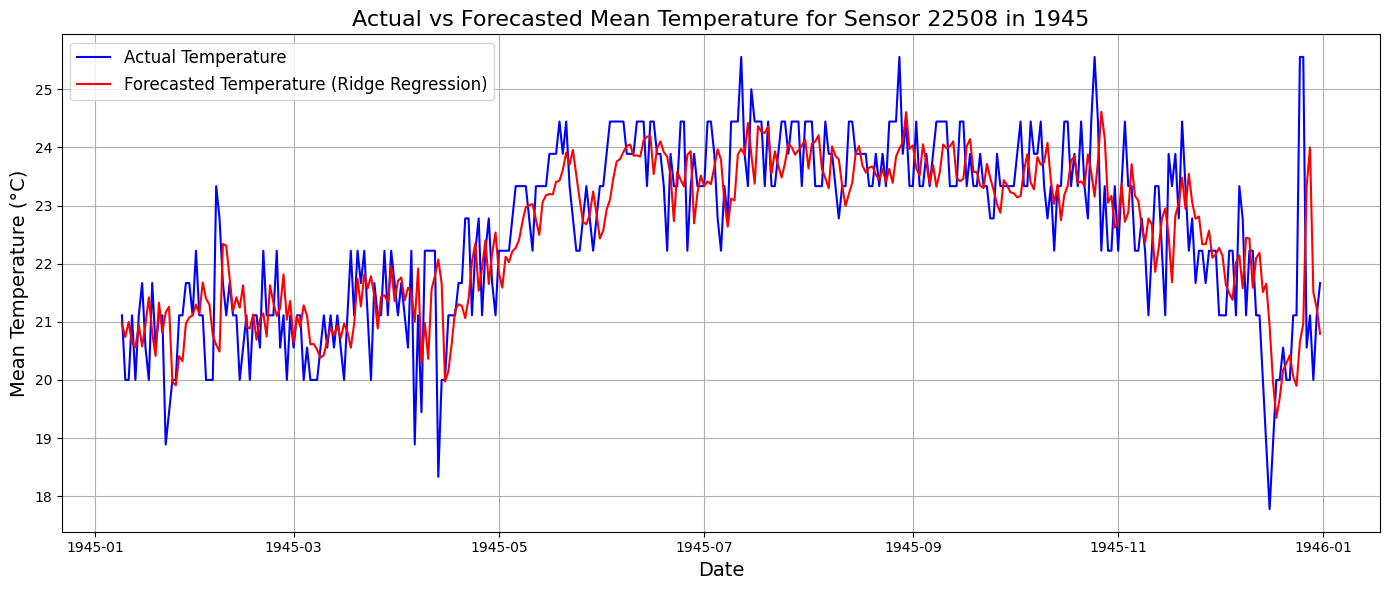

In [71]:
#exercise 3.8
plt.figure(figsize=(14, 6))
plt.plot(test_dates, y_test, color='blue', label='Actual Temperature')
plt.plot(test_dates, best_pred, color='red', label=f'Forecasted Temperature ({best_name})')
plt.title(f'Actual vs Forecasted Mean Temperature for Sensor 22508 in 1945', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Mean Temperature (°C)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


Optimizing the model with different window sizes

Window size = 3
Ridge Regression - MSE: 0.9964, R² Score: 0.5707

Window size = 7
Ridge Regression - MSE: 0.9320, R² Score: 0.5977

Window size = 14
Ridge Regression - MSE: 0.9137, R² Score: 0.6003

Window size = 30
Ridge Regression - MSE: 0.9302, R² Score: 0.5754

Optimal window size: 14 with MSE: 0.9137 and R² Score: 0.6003


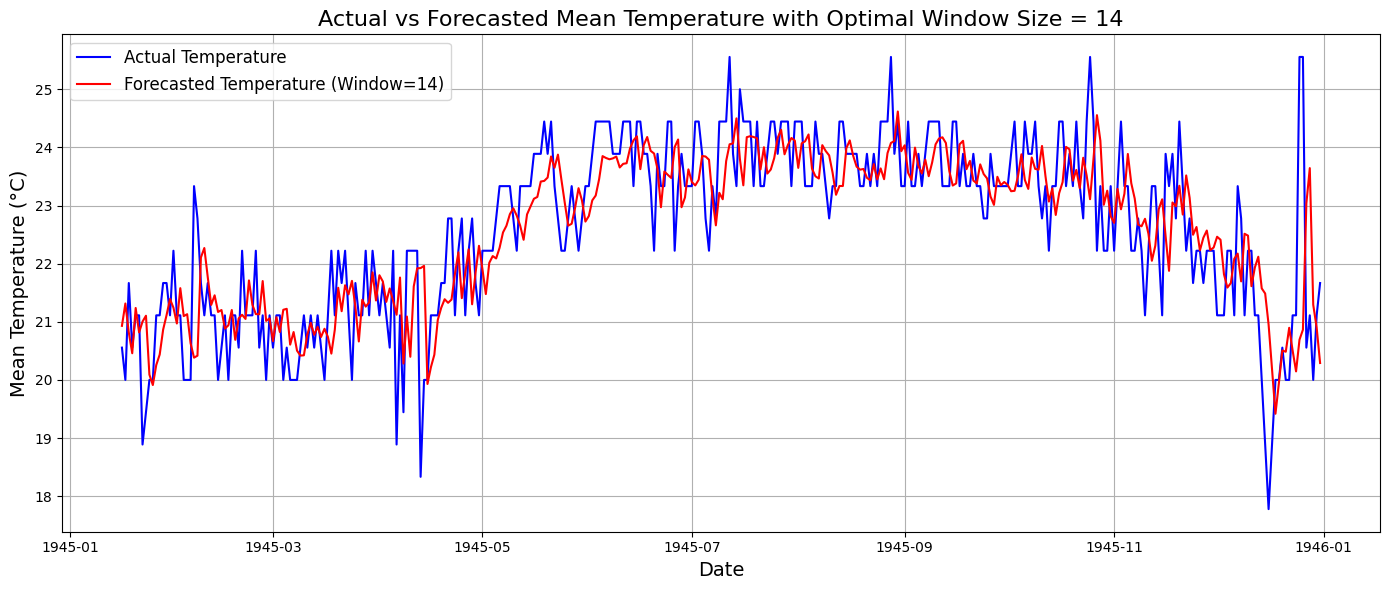


Trying multi-step forecasting (horizon = 7 days)


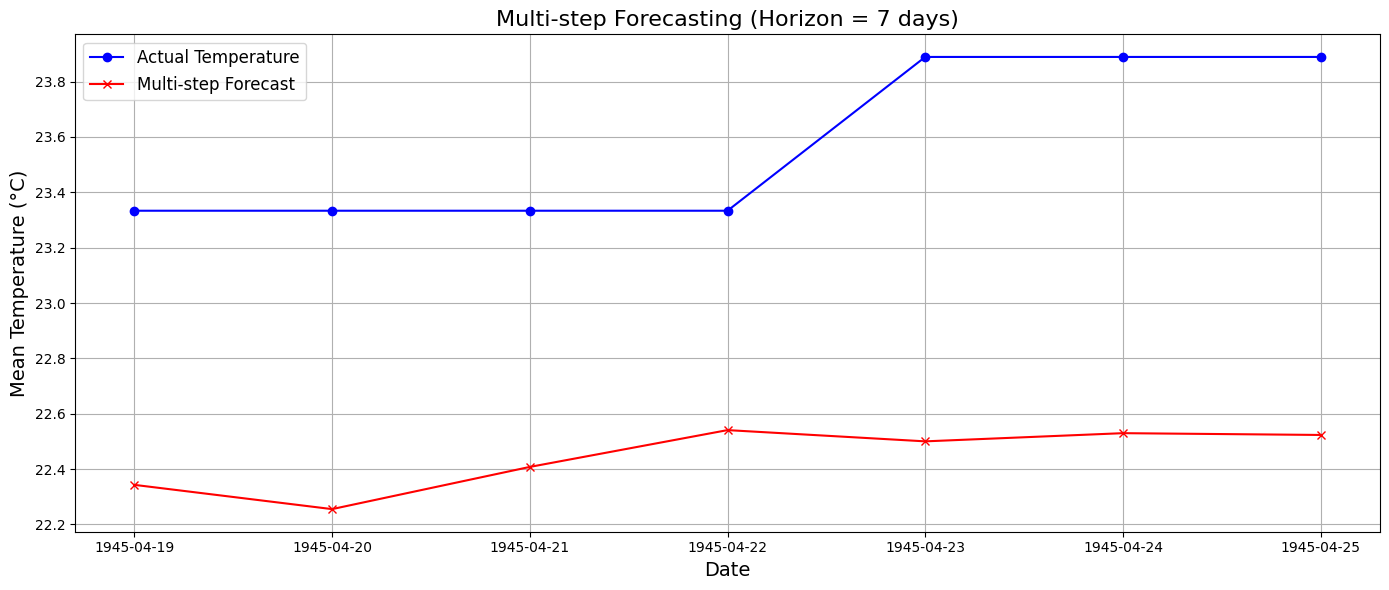

Multi-step forecasting MSE: 1.3240
1-step forecasting MSE (for comparison): 0.9320


In [72]:
#exercise 3.9
print("\nOptimizing the model with different window sizes")

window_sizes = [3, 7, 14, 30]
best_results = []

for window in window_sizes:
    print(f"\nWindow size = {window}")
    X, y = create_rolling_window_dataset(sensor_data, window)

    train_indices = np.where(train_mask.values[:-window-1])[0]
    test_indices = np.where(test_mask.values[:-window-1])[0]

    X_train, y_train = X[train_indices], y[train_indices]
    X_test, y_test = X[test_indices], y[test_indices]

    best_model.fit(X_train, y_train)
    y_pred = best_model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"{best_name} - MSE: {mse:.4f}, R² Score: {r2:.4f}")
    best_results.append((window, mse, r2, y_pred, y_test, test_indices))

optimal_window_idx = np.argmin([result[1] for result in best_results])
optimal_window, optimal_mse, optimal_r2, optimal_pred, optimal_test, optimal_indices = best_results[optimal_window_idx]

print(f"\nOptimal window size: {optimal_window} with MSE: {optimal_mse:.4f} and R² Score: {optimal_r2:.4f}")

optimal_dates = sensor_data.iloc[optimal_indices + optimal_window + 1]['Date'].values

plt.figure(figsize=(14, 6))
plt.plot(optimal_dates, optimal_test, color='blue', label='Actual Temperature')
plt.plot(optimal_dates, optimal_pred, color='red', label=f'Forecasted Temperature (Window={optimal_window})')
plt.title(f'Actual vs Forecasted Mean Temperature with Optimal Window Size = {optimal_window}', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Mean Temperature (°C)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

print("\nTrying multi-step forecasting (horizon = 7 days)")

def forecast_multiple_steps(model, X_initial, steps=7):
    X_current = X_initial.copy()
    forecasts = []

    for _ in range(steps):
        next_pred = model.predict(X_current.reshape(1, -1))[0]
        forecasts.append(next_pred)

        X_current = np.append(X_current[1:], next_pred)

    return np.array(forecasts)

start_idx = 100
X_start = X_test[start_idx]
actual_next_values = y_test[start_idx:start_idx+7]

forecast_horizon = 7
multi_step_forecast = forecast_multiple_steps(best_model, X_start, steps=forecast_horizon)

forecast_dates = sensor_data.iloc[test_indices[start_idx:start_idx+forecast_horizon] + window_size + 1]['Date'].values

plt.figure(figsize=(14, 6))
plt.plot(forecast_dates, actual_next_values, color='blue', marker='o', label='Actual Temperature')
plt.plot(forecast_dates, multi_step_forecast, color='red', marker='x', label='Multi-step Forecast')
plt.title(f'Multi-step Forecasting (Horizon = {forecast_horizon} days)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Mean Temperature (°C)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

multi_step_mse = mean_squared_error(actual_next_values, multi_step_forecast)
print(f"Multi-step forecasting MSE: {multi_step_mse:.4f}")
print(f"1-step forecasting MSE (for comparison): {best_mse:.4f}")
